In [1]:
pip install networkx numpy

Note: you may need to restart the kernel to use updated packages.


In [2]:
import networkx as nx
import itertools

class CliquePercolationMethod:
    def __init__(self, graph, k):
        """
        Initialize the CPM with a graph and the size of cliques (k).
        
        :param graph: A NetworkX graph
        :param k: Size of the cliques
        """
        self.graph = graph
        self.k = k
        self.cliques = self.find_cliques()

    def find_cliques(self):
        """Find all cliques of size k in the graph."""
        return list(nx.find_cliques(self.graph))

    def build_clique_graph(self):
        """Build a graph where nodes are cliques and edges connect overlapping cliques."""
        clique_graph = nx.Graph()
        for clique in self.cliques:
            clique_graph.add_node(tuple(clique))

        for c1, c2 in itertools.combinations(self.cliques, 2):
            if len(set(c1) & set(c2)) >= self.k - 1:  # Check for overlapping nodes
                clique_graph.add_edge(tuple(c1), tuple(c2))
        
        return clique_graph

    def find_communities(self):
        """Find communities in the graph using the clique graph."""
        clique_graph = self.build_clique_graph()
        communities = list(nx.connected_components(clique_graph))
        return [list(map(list, community)) for community in communities]

# Example usage
if __name__ == "__main__":
    # Create a sample graph
    G = nx.Graph()
    edges = [
        (1, 2), (2, 3), (3, 4), (4, 5),
        (1, 5), (6, 7), (7, 8), (8, 9),
        (6, 9), (3, 6), (10, 11), (11, 12)
    ]
    G.add_edges_from(edges)

    # Set the size of the clique
    k = 3  # Size of the clique
    cpm = CliquePercolationMethod(G, k)

    # Find communities
    communities = cpm.find_communities()
    
    print("Detected communities:")
    for community in communities:
        print(community)


Detected communities:
[[1, 2]]
[[1, 5]]
[[3, 2]]
[[3, 4]]
[[3, 6]]
[[5, 4]]
[[7, 8]]
[[7, 6]]
[[8, 9]]
[[9, 6]]
[[10, 11]]
[[11, 12]]


In [3]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


Detected communities:
[[1, 2]]
[[1, 5]]
[[3, 2]]
[[3, 4]]
[[3, 6]]
[[5, 4]]
[[7, 8]]
[[7, 6]]
[[8, 9]]
[[9, 6]]
[[10, 11]]
[[11, 12]]


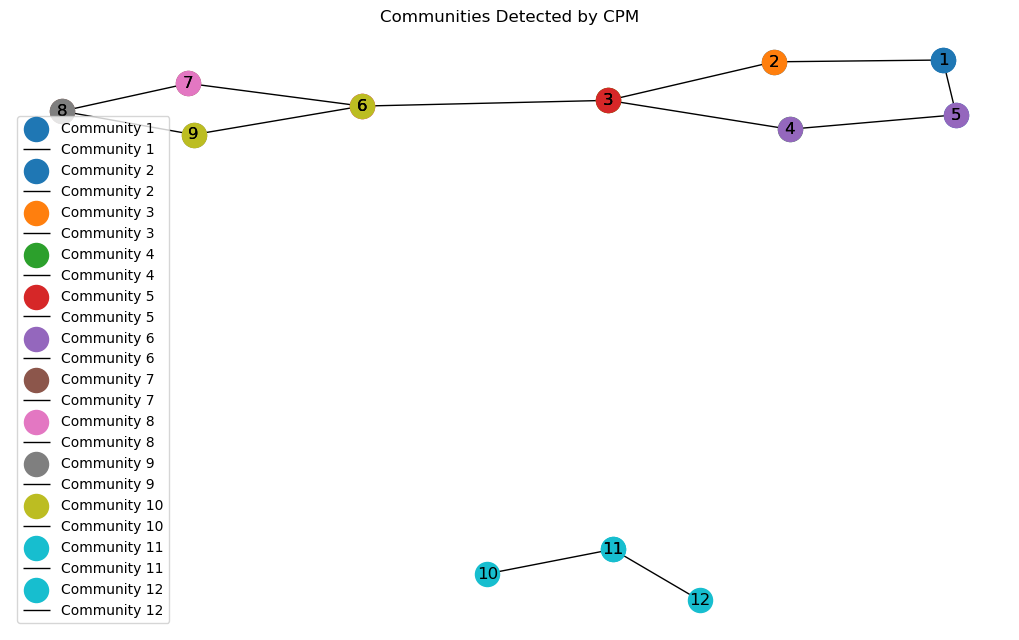

In [4]:
import networkx as nx
import itertools
import matplotlib.pyplot as plt

class CliquePercolationMethod:
    def __init__(self, graph, k):
        """Initialize the CPM with a graph and the size of cliques (k)."""
        self.graph = graph
        self.k = k
        self.cliques = self.find_cliques()

    def find_cliques(self):
        """Find all cliques of size k in the graph."""
        return list(nx.find_cliques(self.graph))

    def build_clique_graph(self):
        """Build a graph where nodes are cliques and edges connect overlapping cliques."""
        clique_graph = nx.Graph()
        for clique in self.cliques:
            clique_graph.add_node(tuple(clique))

        for c1, c2 in itertools.combinations(self.cliques, 2):
            if len(set(c1) & set(c2)) >= self.k - 1:  # Check for overlapping nodes
                clique_graph.add_edge(tuple(c1), tuple(c2))
        
        return clique_graph

    def find_communities(self):
        """Find communities in the graph using the clique graph."""
        clique_graph = self.build_clique_graph()
        communities = list(nx.connected_components(clique_graph))
        return [list(map(list, community)) for community in communities]

    def plot_communities(self, communities):
        """Visualize the graph with communities."""
        pos = nx.spring_layout(self.graph)
        colors = plt.cm.get_cmap("tab10", len(communities))

        plt.figure(figsize=(10, 6))
        for idx, community in enumerate(communities):
            subgraph = self.graph.subgraph(sum(community, []))
            nx.draw(subgraph, pos, node_color=[colors(idx)], label=f'Community {idx + 1}', with_labels=True)

        plt.title('Communities Detected by CPM')
        plt.legend()
        plt.show()

# Example usage
if __name__ == "__main__":
    # Create a sample graph
    G = nx.Graph()
    edges = [
        (1, 2), (2, 3), (3, 4), (4, 5),
        (1, 5), (6, 7), (7, 8), (8, 9),
        (6, 9), (3, 6), (10, 11), (11, 12)
    ]
    G.add_edges_from(edges)

    # Set the size of the clique
    k = 3  # Size of the clique
    cpm = CliquePercolationMethod(G, k)

    # Find communities
    communities = cpm.find_communities()
    
    print("Detected communities:")
    for community in communities:
        print(community)
    
    # Plot communities
    cpm.plot_communities(communities)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Detected communities:
{(1, 2)}
{(1, 5)}
{(3, 2)}
{(3, 4)}
{(3, 6)}
{(5, 4)}
{(7, 8)}
{(7, 6)}
{(8, 9)}
{(9, 6)}
{(10, 11)}
{(11, 12)}


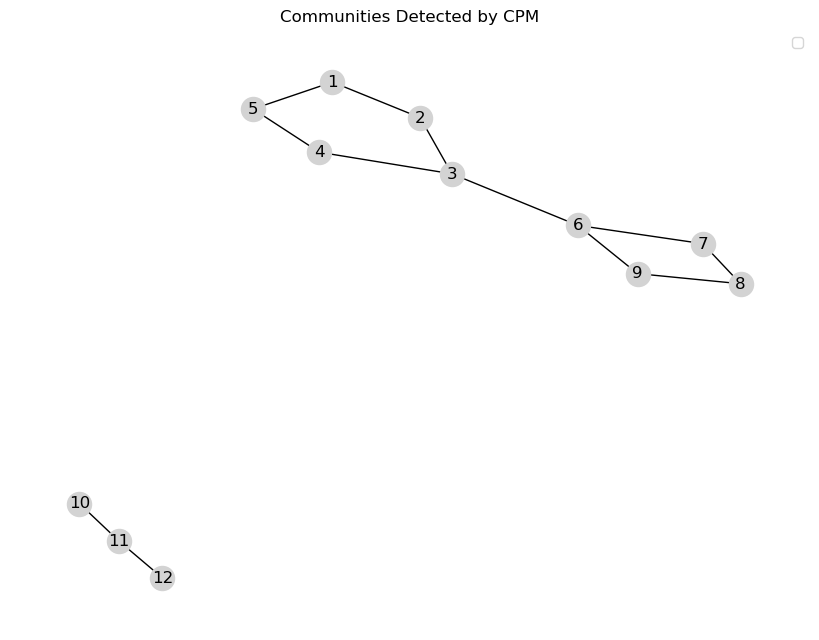

In [7]:
import networkx as nx
import itertools
import matplotlib.pyplot as plt

class CliquePercolationMethod:
    def __init__(self, graph, k):
        """Initialize CPM with a graph and clique size (k)."""
        self.graph = graph
        self.k = k
        self.cliques = self.find_cliques()

    def find_cliques(self):
        """Find all cliques of size k in the graph."""
        return list(nx.find_cliques(self.graph))

    def build_clique_graph(self):
        """Build a graph of cliques where edges connect overlapping cliques."""
        clique_graph = nx.Graph()
        for clique in self.cliques:
            clique_graph.add_node(tuple(clique))

        for c1, c2 in itertools.combinations(self.cliques, 2):
            if len(set(c1) & set(c2)) >= self.k - 1:
                clique_graph.add_edge(tuple(c1), tuple(c2))
        
        return clique_graph

    def find_communities(self):
        """Find communities using the clique graph."""
        clique_graph = self.build_clique_graph()
        return list(nx.connected_components(clique_graph))

    def plot_communities(self, communities):
        """Plot the original graph highlighting communities."""
        pos = nx.spring_layout(self.graph)  # Node positions
        plt.figure(figsize=(8, 6))

        # Assign a color to each community
        color_map = plt.get_cmap("tab10")
        
        # Draw the entire graph in light grey first
        nx.draw(self.graph, pos, node_color='lightgrey', with_labels=True)

        # Highlight communities with different colors
        for idx, community in enumerate(communities):
            # Create a list of nodes in the community
            community_nodes = list(community)
            nx.draw(self.graph.subgraph(community_nodes), pos, 
                    node_color=color_map(idx), label=f'Community {idx + 1}', 
                    with_labels=True)

        plt.title('Communities Detected by CPM')
        plt.legend()
        plt.show()

# Example usage
if __name__ == "__main__":
    # Create a simple graph
    G = nx.Graph()
    edges = [
        (1, 2), (2, 3), (3, 4), (4, 5),
        (1, 5), (6, 7), (7, 8), (8, 9),
        (6, 9), (3, 6), (10, 11), (11, 12)
    ]
    G.add_edges_from(edges)

    # Set the size of the clique
    k = 3  # Size of the clique
    cpm = CliquePercolationMethod(G, k)

    # Find and plot communities
    communities = cpm.find_communities()
    print("Detected communities:")
    for community in communities:
        print(community)
    
    # Plot communities
    cpm.plot_communities(communities)
